In [1]:
#import dependencies
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

import scipy.stats as stats
%matplotlib inline

Hypothesis: If the relative size of a city impacts the number of bookstores per capita, then larger cities will have more bookstores per capita than smaller cities.
Null: If the relative size of a city has no impact on the number of bookstores per capita, then the number of bookstores per capita will remain constant regardless of city size.

In [2]:
#read files
cities_file = "C:/Users/sarah/Desktop/project_1/percap.csv"
cities_data = pd.read_csv(cities_file)
cities_data.head()

,Unnamed: 0,City,Country,Population,Bars,Parks,Galleries,Gyms,Bookstores,Fast Food
0,0,Fairbanks,US,34657,9.810428,1.154168,2.019794,3.173962,1.154168,9.521886
1,1,Detroit,US,1747582,6.866631,1.253160,0.795385,3.913979,0.881218,10.872165
2,2,New Orleans,US,1272995,6.606467,1.052636,1.948162,2.278092,0.644150,5.184624
3,3,Memphis,US,1346931,2.101073,0.564246,0.311820,1.276977,0.259850,5.226697
4,4,Mobile,US,414817,3.061591,0.674996,0.482140,1.518742,0.241070,6.412466


In [3]:
# Figure out the minimum and maximum city size
print(f"The max is {cities_data['Population'].max()} and the minimum is {cities_data['Population'].min()}")

The max is 20177990 and the minimum is 34657


In [4]:
# Create bins for population size based on minimum and maximum
bins = [30000, 150000, 300000, 1000000, 21000000]
# Create labels for these bins
bin_names = ["Large Town", "City", "Large City", "Mega City"]

In [5]:
# Slice the data and place it into bins
# Place the data series into a new column inside of the DataFrame
cities_data["City Type"] = pd.cut(cities_data["Population"], bins, labels=bin_names)
cities_data.head()

,Unnamed: 0,City,Country,Population,Bars,Parks,Galleries,Gyms,Bookstores,Fast Food,City Type
0,0,Fairbanks,US,34657,9.810428,1.154168,2.019794,3.173962,1.154168,9.521886,Large Town
1,1,Detroit,US,1747582,6.866631,1.253160,0.795385,3.913979,0.881218,10.872165,Mega City
2,2,New Orleans,US,1272995,6.606467,1.052636,1.948162,2.278092,0.644150,5.184624,Mega City
3,3,Memphis,US,1346931,2.101073,0.564246,0.311820,1.276977,0.259850,5.226697,Mega City
4,4,Mobile,US,414817,3.061591,0.674996,0.482140,1.518742,0.241070,6.412466,Large City


In [6]:
# Create a GroupBy object based upon bins
binned_cities = cities_data.groupby("City Type")

# Find how many rows fall into each bin
print(binned_cities["City"].count())

City Type
Large Town    81
City          80
Large City    81
Mega City     48
Name: City, dtype: int64


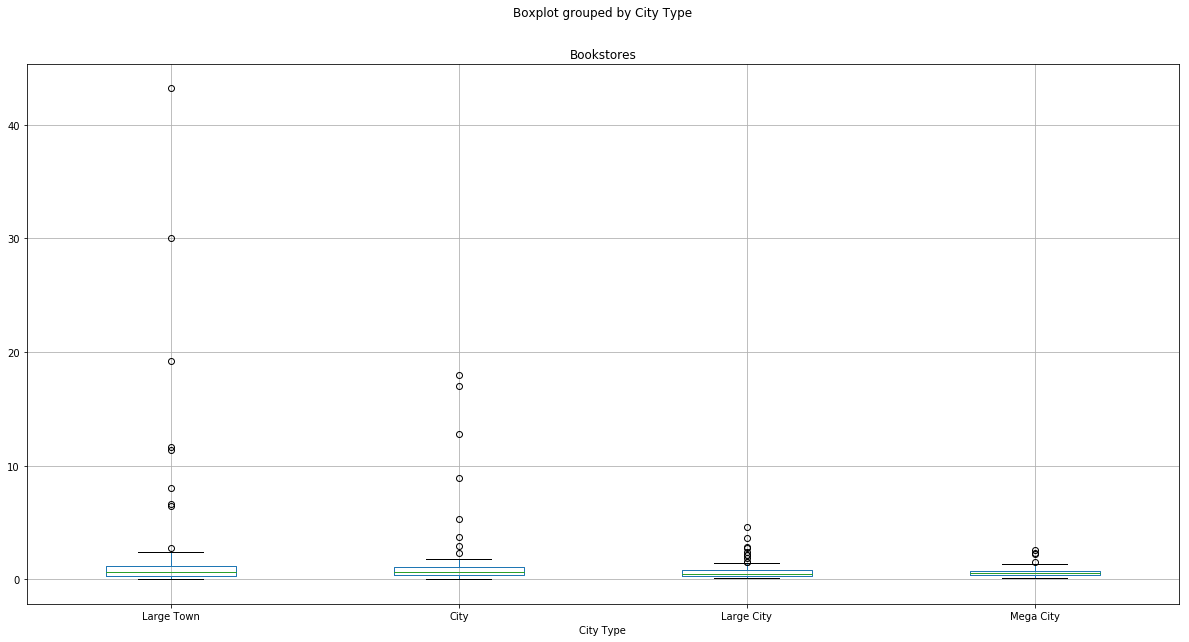

In [10]:
# Create a boxplot to compare means
cities_data.boxplot("Bookstores", by="City Type", figsize=(20, 10))


In [7]:
# Extract individual groups
group1 = cities_data[cities_data["City Type"] == "Large Town"]["Bookstores"]
group2 = cities_data[cities_data["City Type"] == "City"]["Bookstores"]
group3 = cities_data[cities_data["City Type"] == "Large City"]["Bookstores"]
group4 = cities_data[cities_data["City Type"] == "Mega City"]["Bookstores"]

In [8]:
#run statistical anova to determine whether the realative size of a city impacts the number of bars per capita
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=2.969398710608099, pvalue=0.03225300969462374)

With a p-value of less than 0.05, our null hypothesis is correct. Larger cities have more bookstores per capita.